In [89]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from data.parameters import XI_16

In [90]:
data=np.array(XI_16)
# order data by x value
data = np.array(sorted(data, key=lambda x: x[0]))
# Standardize the feature

In [91]:
scaler = StandardScaler()

X = data[:, 0].reshape(-1, 1)  # Feature (reshape to 2D array)
y = data[:, 1]  # Target
X_scaled = scaler.fit_transform(X)


In [92]:
# Generate polynomial features of degree 10
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X_scaled)

In [93]:
# Define the Ridge model
ridge = Ridge()

# Define the grid for the ridge parameter (alpha)
param_grid = {
    'alpha': np.logspace(-20, 20, 60)  # Explore values from 1e-6 to 1e+3
}

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_poly, y)

# Best parameter
best_alpha = grid_search.best_params_['alpha']
print(f"Best Ridge alpha: {best_alpha}")

c:\Users\DimiP\miniconda3\envs\IUdataenv\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.19599e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\DimiP\miniconda3\envs\IUdataenv\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.83671e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\DimiP\miniconda3\envs\IUdataenv\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.80265e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\DimiP\miniconda3\envs\IUdataenv\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.79677e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Dim

Best Ridge alpha: 5355.666917706907


In [94]:
# Best model fitted on the entire dataset
best_model = grid_search.best_estimator_

In [97]:
# calculate the mean squared error
y_pred = best_model.predict(X_poly)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.838902464112825e+23


In [105]:
#create range of x values from -28 to 28
x_values = np.linspace(-20, 22, 1000).reshape(-1, 1)
# scale the x values
x_values_scaled = scaler.transform(x_values)
# transform the scaled x values to polynomial features
x_values_poly = poly.transform(x_values_scaled)
# predict the y values for the x values
y_values = best_model.predict(x_values_poly)


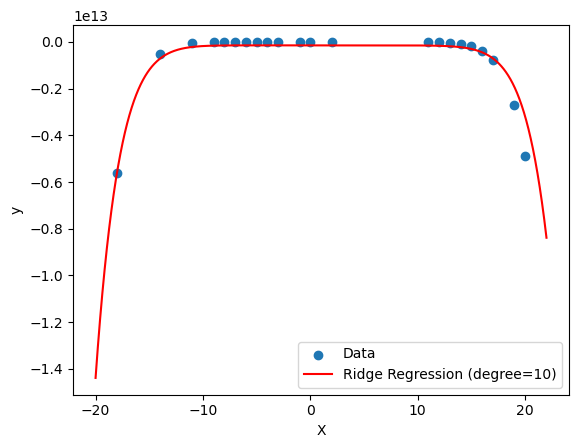

In [106]:
# Plot the data and the fitted polynomial
# and save the plot to pdf in /figures
plt.figure()
plt.scatter(X, y, label='Data')
plt.plot(x_values, y_values, color='red', label='Ridge Regression (degree=10)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.savefig('figures/ridge_plot.pdf')